### Hadoop3.3 + Spark3.0 + IPython3.7 机器学习与大数据实战
## <center>RDD / Spark DataFrame / Spark SQL >>> 数据类型比较</center>
## <center>基于 Hadoop + Spark 大数据分布式存储及运算</center>
### <center>策略制定及验证：张君颖  ； 报告日期：2020.12.22</center>  
  
<font color=blue><center>作者邮箱：zhang.jun.ying@outlook.com</center></font>   
  
<font color=blue><center>项目源代码、数据、自定义函数已上传GitHub：</center></font>   
    
<font color=blue><center>https://github.com/lotbear/Python-Financial-investment-strategy</center></font>

In [1]:
# 查看 Spark 的运行模式，本次算法基于 Hadoop-yarn 架构
# 实现 4 台虚拟机同步进行的分布式运算
sc.master

'yarn'

In [2]:
# 设置全局数据集的路径
# 若 sc.master 查看显示的运行模式为 "local",则使用本地数据集
# 若 sc.master 查看显示的运行模式为其他，如 "yarn"，"spark://master:7077"(Standalone模式)
# 则选择 HDFS 上的数据集
global Path    
if sc.master[0:5]=="local" :
   Path="/home/lotbear/Big-Data/"
else:   
   Path="hdfs://master:9000/user/lotbear/data/"

### <font color=blue>建立 RDD 数据</font>

RDD 是未定义 字段名 及 数据属性的数据类型，我们只能使用位置来指定每一个字段   

在数据处理上，RDD 需用 map-reduce 思想，需要有较高的编程能力   

RDD 也是 Spark 功能中最强大的数据类型   

In [3]:
# 读取文本文件,建立RDD
rawUserData = sc.textFile(Path+"u.user")

In [4]:
rawUserData.count()

943

In [5]:
# 读取 rawUserData 前 5 行数据
rawUserData.take(5)

['1|24|M|technician|85711',
 '2|53|F|other|94043',
 '3|23|M|writer|32067',
 '4|24|M|technician|43537',
 '5|33|F|other|15213']

In [6]:
userRDD =rawUserData.map(lambda line: line.split("|"))
userRDD .take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

### <font color=blue>将 RDD 数据转变为 DataFrame 数据</font>

Spark-DataFrame 创建时，需要定义 Schema (字段名 + 数据类型)   

DataFrame API 定义了很多类似 SQL 的方法，只需具备基础编程能力即可进行数据处理   

且 Spark-DataFrame 和 Pandas-DataFrame 之间可无缝转换，方便使用更丰富的工具包   

In [7]:
# 定义 Schema (字段名 + 数据类型)
from pyspark.sql import Row
user_Rows = userRDD.map(lambda p:Row(userid=int(p[0]), 
                       age=int(p[1]),
                       gender=p[2],
                       occupation=p[3],
                       zipcode=p[4]))
user_Rows.take(5)

[Row(userid=1, age=24, gender='M', occupation='technician', zipcode='85711'),
 Row(userid=2, age=53, gender='F', occupation='other', zipcode='94043'),
 Row(userid=3, age=23, gender='M', occupation='writer', zipcode='32067'),
 Row(userid=4, age=24, gender='M', occupation='technician', zipcode='43537'),
 Row(userid=5, age=33, gender='F', occupation='other', zipcode='15213')]

In [8]:
# 创建 DataFrame 数据
user_df = sqlContext.createDataFrame(user_Rows)
# 查看 Schema (字段名 + 数据类型) long 为数值型， string 为字符型
user_df.printSchema()

root
 |-- userid: long (nullable = true)
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- zipcode: string (nullable = true)



In [9]:
# 查看前 5 行
user_df.show(5)

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     2| 53|     F|     other|  94043|
|     3| 23|     M|    writer|  32067|
|     4| 24|     M|technician|  43537|
|     5| 33|     F|     other|  15213|
+------+---+------+----------+-------+
only showing top 5 rows



In [10]:
# 使用 .alias(）方法为 DataFrame 创建别名
df=user_df.alias("df")
df.show(5)

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     2| 53|     F|     other|  94043|
|     3| 23|     M|    writer|  32067|
|     4| 24|     M|technician|  43537|
|     5| 33|     F|     other|  15213|
+------+---+------+----------+-------+
only showing top 5 rows



### <font color=blue> 将 DataFrame 数据转变为 SQL-table 数据</font>   

Spark-SQL 是由 Spark-DataFrame 派生出来的，我们必须先创建 DataFrame   

然后让 DataFrame 登陆 Spark SQL tempTable，就可以使用 SQL 语句了   

Spark-SQL 是最简单的数据类型，非程序设计人员也可以轻松上手      

另外，SparkSession 可以同时具备 Spark context / sqlContext / HiveContext 的功能

In [11]:
# 用 SparkSession 指令，创建 sqlContext
sqlContext = SparkSession.builder.getOrCreate()

In [12]:
# 让 DataFrame 登陆 Spark SQL tempTable
# 创建临时表 user_table
user_df.registerTempTable("user_table")

In [13]:
# 用 Spark SQL 查看项数
# 如果 SQL 语句过长，为方便阅读，可用 """ 三个引号多行书写
sqlContext.sql(" SELECT count(*) counts FROM user_table").show()

+------+
|counts|
+------+
|   943|
+------+



In [14]:
sqlContext.sql(" SELECT *  FROM user_table ").show(10)

+------+---+------+-------------+-------+
|userid|age|gender|   occupation|zipcode|
+------+---+------+-------------+-------+
|     1| 24|     M|   technician|  85711|
|     2| 53|     F|        other|  94043|
|     3| 23|     M|       writer|  32067|
|     4| 24|     M|   technician|  43537|
|     5| 33|     F|        other|  15213|
|     6| 42|     M|    executive|  98101|
|     7| 57|     M|administrator|  91344|
|     8| 36|     M|administrator|  05201|
|     9| 29|     M|      student|  01002|
|    10| 53|     M|       lawyer|  90703|
+------+---+------+-------------+-------+
only showing top 10 rows



In [15]:
sqlContext.sql(" SELECT *  FROM user_table").show(5)

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     2| 53|     F|     other|  94043|
|     3| 23|     M|    writer|  32067|
|     4| 24|     M|technician|  43537|
|     5| 33|     F|     other|  15213|
+------+---+------+----------+-------+
only showing top 5 rows



In [16]:
sqlContext.sql(" SELECT *  FROM user_table LIMIT 5").show()

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     2| 53|     F|     other|  94043|
|     3| 23|     M|    writer|  32067|
|     4| 24|     M|technician|  43537|
|     5| 33|     F|     other|  15213|
+------+---+------+----------+-------+



### <font color=blue>RDD / DataFrame / Spark SQL 显示部分字段</font>

In [17]:
# RDD 操作
userRDDnew= userRDD.map(lambda x: (x[0],x[3],x[2] ,x[1]) )
userRDDnew.take(5)

[('1', 'technician', 'M', '24'),
 ('2', 'other', 'F', '53'),
 ('3', 'writer', 'M', '23'),
 ('4', 'technician', 'M', '24'),
 ('5', 'other', 'F', '33')]

In [18]:
# DataFrame 操作
user_df.select("userid","occupation","gender","age").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [19]:
df.select(df.userid,df.occupation,df.gender,df.age  ).show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [20]:
df[df['userid'],df['occupation'],df['gender'],df['age']  ].show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [21]:
# SQL 操作
sqlContext.sql(" SELECT userid,occupation,gender,age  FROM user_table").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



### <font color=blue>RDD / DataFrame / Spark SQL 增加计算字段</font>

数据中，我们只知道今年用户的年龄 age   

如果我们想知道用户的出生年份，只需增加字段 2021- int(x[1])

In [22]:
# RDD 操作
userRDDnew= userRDD.map(lambda x: (x[0],x[3],x[2],x[1] ,2021-int(x[1])) )
userRDDnew.take(5)

[('1', 'technician', 'M', '24', 1997),
 ('2', 'other', 'F', '53', 1968),
 ('3', 'writer', 'M', '23', 1998),
 ('4', 'technician', 'M', '24', 1997),
 ('5', 'other', 'F', '33', 1988)]

In [23]:
# DataFrame 操作
df.select("userid","occupation","gender","age",2021-df.age).show(5)

+------+----------+------+---+------------+
|userid|occupation|gender|age|(2021 - age)|
+------+----------+------+---+------------+
|     1|technician|     M| 24|        1997|
|     2|     other|     F| 53|        1968|
|     3|    writer|     M| 23|        1998|
|     4|technician|     M| 24|        1997|
|     5|     other|     F| 33|        1988|
+------+----------+------+---+------------+
only showing top 5 rows



In [24]:
df.select("userid","occupation","gender","age",(2021-df.age).alias("birthyear")).show(5)

+------+----------+------+---+---------+
|userid|occupation|gender|age|birthyear|
+------+----------+------+---+---------+
|     1|technician|     M| 24|     1997|
|     2|     other|     F| 53|     1968|
|     3|    writer|     M| 23|     1998|
|     4|technician|     M| 24|     1997|
|     5|     other|     F| 33|     1988|
+------+----------+------+---+---------+
only showing top 5 rows



In [25]:
sqlContext.sql("""
SELECT userid,occupation,gender,age,2016-age birthyear 
FROM user_table""").show(5)

+------+----------+------+---+---------+
|userid|occupation|gender|age|birthyear|
+------+----------+------+---+---------+
|     1|technician|     M| 24|     1992|
|     2|     other|     F| 53|     1963|
|     3|    writer|     M| 23|     1993|
|     4|technician|     M| 24|     1992|
|     5|     other|     F| 33|     1983|
+------+----------+------+---+---------+
only showing top 5 rows



### <font color=blue>RDD / DataFrame / Spark SQL 筛选数据</font>

In [26]:
# RDD 操作
userRDD.filter(lambda r:r[3]=='technician' and r[2]=='M' and r[1]=='24').take(6)    

[['1', '24', 'M', 'technician', '85711'],
 ['4', '24', 'M', 'technician', '43537'],
 ['456', '24', 'M', 'technician', '31820'],
 ['717', '24', 'M', 'technician', '84105'],
 ['832', '24', 'M', 'technician', '77042'],
 ['889', '24', 'M', 'technician', '78704']]

In [27]:
# DataFrame 操作
user_df.filter("occupation='technician'").filter("gender='M' ").filter("age=24").show()

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     4| 24|     M|technician|  43537|
|   456| 24|     M|technician|  31820|
|   717| 24|     M|technician|  84105|
|   832| 24|     M|technician|  77042|
|   889| 24|     M|technician|  78704|
+------+---+------+----------+-------+



In [28]:
user_df.filter("occupation='technician' and gender='M' and age=24").show()

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     4| 24|     M|technician|  43537|
|   456| 24|     M|technician|  31820|
|   717| 24|     M|technician|  84105|
|   832| 24|     M|technician|  77042|
|   889| 24|     M|technician|  78704|
+------+---+------+----------+-------+



In [29]:
df.filter((df.occupation=='technician' ) & (df.gender=='M' ) & (df.age==24)).show()

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     4| 24|     M|technician|  43537|
|   456| 24|     M|technician|  31820|
|   717| 24|     M|technician|  84105|
|   832| 24|     M|technician|  77042|
|   889| 24|     M|technician|  78704|
+------+---+------+----------+-------+



In [30]:
df.filter((df['occupation']=='technician' ) & (df['gender']=='M' ) & (df['age']==24)).show()

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     4| 24|     M|technician|  43537|
|   456| 24|     M|technician|  31820|
|   717| 24|     M|technician|  84105|
|   832| 24|     M|technician|  77042|
|   889| 24|     M|technician|  78704|
+------+---+------+----------+-------+



In [31]:
# Spark SQL 操作
sqlContext.sql('''SELECT * FROM user_table 
where occupation='technician' and   gender='M' and age=24''').show(5)

+------+---+------+----------+-------+
|userid|age|gender|occupation|zipcode|
+------+---+------+----------+-------+
|     1| 24|     M|technician|  85711|
|     4| 24|     M|technician|  43537|
|   456| 24|     M|technician|  31820|
|   717| 24|     M|technician|  84105|
|   832| 24|     M|technician|  77042|
+------+---+------+----------+-------+
only showing top 5 rows



### <font color=blue>RDD / DataFrame / Spark SQL 单个字段排序数据</font>

In [32]:
# RDD 以年龄为指标，正排序
userRDD.takeOrdered(5, key = lambda x: int(x[1]))

[['30', '7', 'M', 'student', '55436'],
 ['471', '10', 'M', 'student', '77459'],
 ['289', '11', 'M', 'none', '94619'],
 ['142', '13', 'M', 'other', '48118'],
 ['609', '13', 'F', 'student', '55106']]

In [33]:
# RDD 以年龄为指标，倒排序
userRDD.takeOrdered(5, key = lambda x: -1*int(x[1]))

[['481', '73', 'M', 'retired', '37771'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['860', '70', 'F', 'retired', '48322'],
 ['559', '69', 'M', 'executive', '10022']]

In [34]:
# DataFrame 以年龄为指标，正排序
df.select("userid","occupation","gender","age").orderBy(df.age).show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|    30|   student|     M|  7|
|   471|   student|     M| 10|
|   289|      none|     M| 11|
|   880|   student|     M| 13|
|   628|      none|     M| 13|
+------+----------+------+---+
only showing top 5 rows



In [35]:
# DataFrame 以年龄为指标，倒排序
df.select("userid","occupation","gender","age").orderBy("age",ascending=0).show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [36]:
df.select("userid","occupation","gender","age").orderBy(df.age.desc()).show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [37]:
# SQL 以年龄为指标，正排序
sqlContext.sql("""SELECT userid,occupation,gender,age   
               FROM user_table 
               ORDER BY age""").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|    30|   student|     M|  7|
|   471|   student|     M| 10|
|   289|      none|     M| 11|
|   142|     other|     M| 13|
|   609|   student|     F| 13|
+------+----------+------+---+
only showing top 5 rows



In [38]:
# SQL 以年龄为指标，倒排序
sqlContext.sql("""SELECT userid,occupation,gender,age   
               FROM user_table 
               ORDER BY age DESC""").show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



### <font color=blue>RDD / DataFrame / Spark SQL 多字段排序数据</font>

In [39]:
# RDD 以年龄 age 为指标，倒排序，以性别 gender 为指标，正排序
# 即：先以年龄为指标排序，再以性别为指标排序
# 其中，性别字母顺序 F < M
userRDD.takeOrdered(5, key = lambda x: (-int(x[1]), x[2] ) )

[['481', '73', 'M', 'retired', '37771'],
 ['860', '70', 'F', 'retired', '48322'],
 ['767', '70', 'M', 'engineer', '00000'],
 ['803', '70', 'M', 'administrator', '78212'],
 ['559', '69', 'M', 'executive', '10022']]

In [40]:
# DataFrame 以年龄 age 为指标，倒排序，以性别 gender 为指标，正排序
df.orderBy(["age","gender"],ascending=[0,1] ).show(5)

+------+---+------+-------------+-------+
|userid|age|gender|   occupation|zipcode|
+------+---+------+-------------+-------+
|   481| 73|     M|      retired|  37771|
|   860| 70|     F|      retired|  48322|
|   803| 70|     M|administrator|  78212|
|   767| 70|     M|     engineer|  00000|
|   559| 69|     M|    executive|  10022|
+------+---+------+-------------+-------+
only showing top 5 rows



In [41]:
df.orderBy(df.age.desc(),df.gender ).show(5)

+------+---+------+-------------+-------+
|userid|age|gender|   occupation|zipcode|
+------+---+------+-------------+-------+
|   481| 73|     M|      retired|  37771|
|   860| 70|     F|      retired|  48322|
|   803| 70|     M|administrator|  78212|
|   767| 70|     M|     engineer|  00000|
|   559| 69|     M|    executive|  10022|
+------+---+------+-------------+-------+
only showing top 5 rows



In [42]:
# SQL 以年龄 age 为指标，倒排序，以性别 gender 为指标，正排序
sqlContext.sql("""SELECT userid, age, gender,occupation,zipcode
               FROM user_table
               ORDER BY age DESC,gender """).show(5)

+------+---+------+-------------+-------+
|userid|age|gender|   occupation|zipcode|
+------+---+------+-------------+-------+
|   481| 73|     M|      retired|  37771|
|   860| 70|     F|      retired|  48322|
|   803| 70|     M|administrator|  78212|
|   767| 70|     M|     engineer|  00000|
|   559| 69|     M|    executive|  10022|
+------+---+------+-------------+-------+
only showing top 5 rows



### <font color=blue>RDD / DataFrame / Spark SQL 显示不重复数据</font>

In [43]:
# RDD 单一字段不重复
userRDD.map( lambda x:x[2] ).distinct().collect()

['M', 'F']

In [44]:
# RDD 多字段不重复
userRDD.map( lambda x:(x[1],x[2]) ).distinct().take(10)

[('23', 'M'),
 ('42', 'M'),
 ('36', 'M'),
 ('39', 'F'),
 ('28', 'F'),
 ('47', 'M'),
 ('49', 'F'),
 ('30', 'M'),
 ('35', 'F'),
 ('42', 'F')]

In [45]:
# DataFrame 单一字段不重复
user_df.select("gender").distinct().show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [46]:
# DataFrame 多字段不重复
user_df.select("age","gender").distinct().show(10)

+---+------+
|age|gender|
+---+------+
| 39|     F|
| 48|     M|
| 26|     M|
| 28|     M|
| 54|     M|
| 60|     M|
| 50|     M|
| 53|     F|
| 30|     M|
| 48|     F|
+---+------+
only showing top 10 rows



In [47]:
# SQL 单一字段不重复
sqlContext.sql(" SELECT distinct gender FROM user_table").show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [48]:
# SQL 多字段不重复
sqlContext.sql(" SELECT distinct age,gender  FROM user_table").show(10)

+---+------+
|age|gender|
+---+------+
| 39|     F|
| 48|     M|
| 26|     M|
| 28|     M|
| 54|     M|
| 60|     M|
| 50|     M|
| 53|     F|
| 30|     M|
| 48|     F|
+---+------+
only showing top 10 rows



### <font color=blue>RDD / DataFrame / Spark SQL 分组统计数据</font>

In [49]:
# RDD 需要 map-reduce 动作
# lambda x: (x[2],1)) 使变量取值为 1
# lambda x,y:x+y 为求和公式
userRDD.map(lambda x: (x[2],1)) \
               .reduceByKey(lambda x,y:x+y).collect()

[('M', 670), ('F', 273)]

In [50]:
# RDD 多变量统计求和
userRDD.map(lambda x: ((x[2],x[3]),1)).reduceByKey(lambda x,y: x+y).take(10)

[(('M', 'technician'), 26),
 (('M', 'writer'), 26),
 (('M', 'lawyer'), 10),
 (('M', 'scientist'), 28),
 (('M', 'entertainment'), 16),
 (('M', 'librarian'), 22),
 (('F', 'librarian'), 29),
 (('F', 'marketing'), 10),
 (('M', 'marketing'), 16),
 (('M', 'healthcare'), 5)]

In [51]:
# DataFrame 单变量统计求和
user_df.select("gender").groupby("gender").count().show()  

+------+-----+
|gender|count|
+------+-----+
|     F|  273|
|     M|  670|
+------+-----+



In [52]:
# DataFrame 多变量统计求和
user_df.select("gender","occupation").\
                groupby("gender","occupation").count().\
                orderBy("gender","occupation").show(10)

+------+-------------+-----+
|gender|   occupation|count|
+------+-------------+-----+
|     F|administrator|   36|
|     F|       artist|   13|
|     F|     educator|   26|
|     F|     engineer|    2|
|     F|entertainment|    2|
|     F|    executive|    3|
|     F|   healthcare|   11|
|     F|    homemaker|    6|
|     F|       lawyer|    2|
|     F|    librarian|   29|
+------+-------------+-----+
only showing top 10 rows



In [53]:
# DataFrame 多变量统计数据
user_df.stat.crosstab("occupation","gender" ).show(10)

+-----------------+---+---+
|occupation_gender|  F|  M|
+-----------------+---+---+
|        scientist|  3| 28|
|          student| 60|136|
|           writer| 19| 26|
|         salesman|  3|  9|
|          retired|  1| 13|
|    administrator| 36| 43|
|       programmer|  6| 60|
|           doctor|  0|  7|
|        homemaker|  6|  1|
|        executive|  3| 29|
+-----------------+---+---+
only showing top 10 rows



In [54]:
# DataFrame 统计性分析
user_df.describe().show()

+-------+-----------------+-----------------+------+-------------+------------------+
|summary|           userid|              age|gender|   occupation|           zipcode|
+-------+-----------------+-----------------+------+-------------+------------------+
|  count|              943|              943|   943|          943|               943|
|   mean|            472.0|34.05196182396607|  null|         null| 50868.78810810811|
| stddev|272.3649512449549|12.19273973305903|  null|         null|30891.373254138158|
|    min|                1|                7|     F|administrator|             00000|
|    max|              943|               73|     M|       writer|             Y1A6B|
+-------+-----------------+-----------------+------+-------------+------------------+



In [55]:
# SQL 单变量统计求和
sqlContext.sql(""" SELECT gender ,count(*)  counts  
               FROM   user_table 
               GROUP BY gender""").show()

+------+------+
|gender|counts|
+------+------+
|     F|   273|
|     M|   670|
+------+------+



In [56]:
# SQL 多变量统计求和
sqlContext.sql(""" SELECT gender,occupation,count(*) counts  
               FROM   user_table 
               GROUP BY gender,occupation """).show(10)

+------+-------------+------+
|gender|   occupation|counts|
+------+-------------+------+
|     M|    executive|    29|
|     M|     educator|    69|
|     F|         none|     4|
|     F|entertainment|     2|
|     F|      retired|     1|
|     F|       artist|    13|
|     F|    librarian|    29|
|     F|     engineer|     2|
|     F|   healthcare|    11|
|     F|administrator|    36|
+------+-------------+------+
only showing top 10 rows



### <font color=blue>Join关联数据 >>> ZipCode</font>

user_table 有 Zipcode 字段，但该字段为用户所在 “州” 的编码   

为显示用户所在州名，我们需要将其与另一份 “州名编码” 数据进行关联

In [57]:
# 读取 “州名编码”--> zipcode-database 数据
rawDataWithHeader = sc.textFile(Path+"free-zipcode-database-Primary.csv")
# 显示前 2 行
rawDataWithHeader.take(2)

['"Zipcode","ZipCodeType","City","State","LocationType","Lat","Long","Location","Decommisioned","TaxReturnsFiled","EstimatedPopulation","TotalWages"',
 '"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,']

In [58]:
# 删首行 “表头”
header = rawDataWithHeader.first()
rawData = rawDataWithHeader.filter(lambda x:x !=header)
rawData.first()

'"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,'

In [59]:
# 删除 引号
rData=rawData.map(lambda x: x.replace("\"", ""))   
rData.first()

'00705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,false,,,'

In [60]:
# 用分隔符 获取每个字段数据
ZipRDD = rData.map(lambda x: x.split(","))
ZipRDD.first()

['00705',
 'STANDARD',
 'AIBONITO',
 'PR',
 'PRIMARY',
 '18.14',
 '-66.26',
 'NA-US-PR-AIBONITO',
 'false',
 '',
 '',
 '']

### <font color=blue>将 RDD 数据转变为 DataFrame 数据 </font>

In [61]:
# 定义 Schema (字段名 + 数据类型)
from pyspark.sql import Row
zipcode_data =ZipRDD.map(lambda p: Row(zipcode=int(p[0]), 
                         zipCodeType=p[1],city=p[2],state=p[3]))
zipcode_data.take(5)
type(zipcode_data)

pyspark.rdd.PipelinedRDD

In [62]:
# 创建 DataFrame 数据
zipcode_df = sqlContext.createDataFrame(zipcode_data )
zipcode_df.printSchema()

root
 |-- zipcode: long (nullable = true)
 |-- zipCodeType: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)



### <font color=blue>将 DataFrame 数据转变为 SQL-table 数据 </font>

In [63]:
# 让 DataFrame 登陆 Spark SQL tempTable
# 创建临时表 zipcode_table
zipcode_df.registerTempTable("zipcode_table")
zipcode_df.show(10)

+-------+-----------+---------+-----+
|zipcode|zipCodeType|     city|state|
+-------+-----------+---------+-----+
|    705|   STANDARD| AIBONITO|   PR|
|    610|   STANDARD|   ANASCO|   PR|
|    611|     PO BOX|  ANGELES|   PR|
|    612|   STANDARD|  ARECIBO|   PR|
|    601|   STANDARD| ADJUNTAS|   PR|
|    631|     PO BOX| CASTANER|   PR|
|    602|   STANDARD|   AGUADA|   PR|
|    603|   STANDARD|AGUADILLA|   PR|
|    604|     PO BOX|AGUADILLA|   PR|
|    605|     PO BOX|AGUADILLA|   PR|
+-------+-----------+---------+-----+
only showing top 10 rows



In [64]:
sqlContext.sql(""" SELECT z.* 
              FROM zipcode_table z 
              """).show(10)

+-------+-----------+---------+-----+
|zipcode|zipCodeType|     city|state|
+-------+-----------+---------+-----+
|    705|   STANDARD| AIBONITO|   PR|
|    610|   STANDARD|   ANASCO|   PR|
|    611|     PO BOX|  ANGELES|   PR|
|    612|   STANDARD|  ARECIBO|   PR|
|    601|   STANDARD| ADJUNTAS|   PR|
|    631|     PO BOX| CASTANER|   PR|
|    602|   STANDARD|   AGUADA|   PR|
|    603|   STANDARD|AGUADILLA|   PR|
|    604|     PO BOX|AGUADILLA|   PR|
|    605|     PO BOX|AGUADILLA|   PR|
+-------+-----------+---------+-----+
only showing top 10 rows



In [65]:
# 将之前暂存的 user_table + 当下的 zipcode_table 联接
# 选择 user_table 全部数据 + zipcode_table 的两项数据
# 以相同的 zipcode 进行对应联接
# 且仅筛选出 state = NY 的前10个数据
sqlContext.sql(""" SELECT u.* ,z.city,z.state 
               FROM user_table u 
               LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
               WHERE z.state='NY'""").show(10)

+------+---+------+-------------+-------+----------------+-----+
|userid|age|gender|   occupation|zipcode|            city|state|
+------+---+------+-------------+-------+----------------+-----+
|   405| 22|     F|   healthcare|  10019|        NEW YORK|   NY|
|   478| 29|     M|        other|  10019|        NEW YORK|   NY|
|   327| 22|     M|      student|  11101|LONG ISLAND CITY|   NY|
|   656| 48|     M|     educator|  10314|   STATEN ISLAND|   NY|
|   617| 27|     F|       writer|  11201|        BROOKLYN|   NY|
|   760| 35|     F|        other|  14211|         BUFFALO|   NY|
|   155| 32|     F|        other|  11217|        BROOKLYN|   NY|
|   557| 30|     F|       writer|  11217|        BROOKLYN|   NY|
|   806| 27|     M|    marketing|  11217|        BROOKLYN|   NY|
|   509| 23|     M|administrator|  10011|        NEW YORK|   NY|
+------+---+------+-------------+-------+----------------+-----+
only showing top 10 rows



In [66]:
sqlContext.sql(""" SELECT z.state ,count(*)
               FROM user_table u
               LEFT JOIN zipcode_table z  ON u.zipcode = z.zipcode
               GROUP BY z.state """).show(10)

+-----+--------+
|state|count(1)|
+-----+--------+
|   AZ|      14|
|   SC|      11|
|   LA|       6|
|   MN|      78|
|   NJ|      18|
|   DC|      14|
|   OR|      20|
|   VA|      27|
| null|      35|
|   RI|       3|
+-----+--------+
only showing top 10 rows



In [67]:
# DataFrame 表的连接
joined_df=user_df.join(zipcode_df , \
                      user_df.zipcode == zipcode_df.zipcode, "left_outer")
joined_df.printSchema()    

root
 |-- userid: long (nullable = true)
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- zipcode: long (nullable = true)
 |-- zipCodeType: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)



In [68]:
joined_df.show(10)

+------+---+------+-------------+-------+-------+-----------+-------------+-----+
|userid|age|gender|   occupation|zipcode|zipcode|zipCodeType|         city|state|
+------+---+------+-------------+-------+-------+-----------+-------------+-----+
|   131| 59|     F|administrator|  15237|  15237|   STANDARD|   PITTSBURGH|   PA|
|   619| 17|     M|      student|  44134|  44134|   STANDARD|    CLEVELAND|   OH|
|   839| 38|     F|entertainment|  90814|  90814|   STANDARD|   LONG BEACH|   CA|
|   409| 48|     M|administrator|  98225|  98225|   STANDARD|   BELLINGHAM|   WA|
|   791| 31|     M|     educator|  20064|  20064|     UNIQUE|   WASHINGTON|   DC|
|   271| 51|     M|     engineer|  22932|  22932|   STANDARD|       CROZET|   VA|
|   375| 17|     M|entertainment|  37777|  37777|   STANDARD|   LOUISVILLE|   TN|
|   272| 33|     M|    scientist|  53706|  53706|   STANDARD|      MADISON|   WI|
|   758| 27|     M|      student|  53706|  53706|   STANDARD|      MADISON|   WI|
|   344| 30|    

In [69]:
joined_df.filter("state='NY' ").show(10)

+------+---+------+-------------+-------+-------+-----------+----------------+-----+
|userid|age|gender|   occupation|zipcode|zipcode|zipCodeType|            city|state|
+------+---+------+-------------+-------+-------+-----------+----------------+-----+
|   405| 22|     F|   healthcare|  10019|  10019|   STANDARD|        NEW YORK|   NY|
|   478| 29|     M|        other|  10019|  10019|   STANDARD|        NEW YORK|   NY|
|   327| 22|     M|      student|  11101|  11101|   STANDARD|LONG ISLAND CITY|   NY|
|   656| 48|     M|     educator|  10314|  10314|   STANDARD|   STATEN ISLAND|   NY|
|   617| 27|     F|       writer|  11201|  11201|   STANDARD|        BROOKLYN|   NY|
|   760| 35|     F|        other|  14211|  14211|   STANDARD|         BUFFALO|   NY|
|   155| 32|     F|        other|  11217|  11217|   STANDARD|        BROOKLYN|   NY|
|   557| 30|     F|       writer|  11217|  11217|   STANDARD|        BROOKLYN|   NY|
|   806| 27|     M|    marketing|  11217|  11217|   STANDARD|    

In [70]:
GroupByState_df=joined_df.groupBy("state").count()
GroupByState_df.show(10)

+-----+-----+
|state|count|
+-----+-----+
|   AZ|   14|
|   SC|   11|
|   LA|    6|
|   MN|   78|
|   NJ|   18|
|   DC|   14|
|   OR|   20|
|   VA|   27|
| null|   35|
|   RI|    3|
+-----+-----+
only showing top 10 rows



### <font color=blue>以 Pandas DataFrame 绘图</font>

In [71]:
import pandas as pd
GroupByState_pandas_df =GroupByState_df.toPandas().set_index('state')
GroupByState_pandas_df[:10]

,count
state,
AZ,14
SC,11
LA,6
MN,78
NJ,18
DC,14
OR,20
VA,27
NaN,35


In [72]:
GroupByState_pandas_df.T

state,AZ,SC,LA,MN,NJ,DC,OR,VA,None,RI,...,MA,KS,CO,FL,AK,AR,OK,AP,UT,HI
count,14,11,6,78,18,14,20,27,35,3,...,35,4,20,24,5,1,9,1,9,2


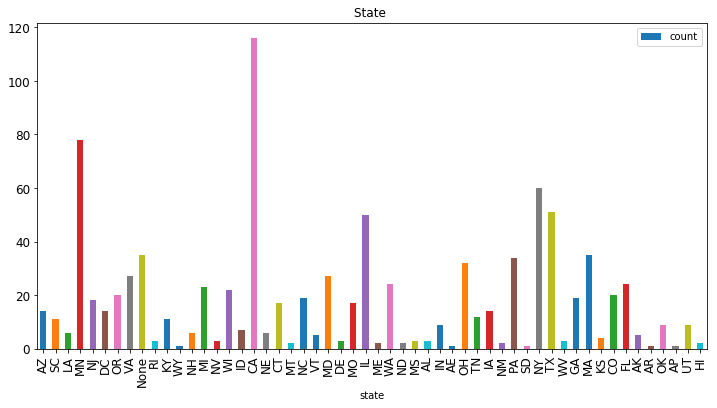

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = GroupByState_pandas_df ['count']  \
            .plot(kind='bar', title ="State ",figsize=(12,6),legend=True, fontsize=12)
plt.show()

In [74]:
Occupation_df=sqlContext.sql(""" 
SELECT u.occupation ,count(*) counts
FROM user_table u
GROUP BY occupation
""")
Occupation_df.show(10)

+----------+------+
|occupation|counts|
+----------+------+
| librarian|    51|
|   retired|    14|
|    lawyer|    12|
|      none|     9|
|    writer|    45|
|programmer|    66|
| marketing|    26|
|     other|   105|
| executive|    32|
| scientist|    31|
+----------+------+
only showing top 10 rows



In [75]:
# 将 Spark-DataFrame 转变为 Pandas-DataFrame
Occupation_pandas_df =Occupation_df.toPandas().set_index('occupation')
Occupation_pandas_df[:10]

,counts
occupation,
librarian,51
retired,14
lawyer,12
none,9
writer,45
programmer,66
marketing,26
other,105
executive,32


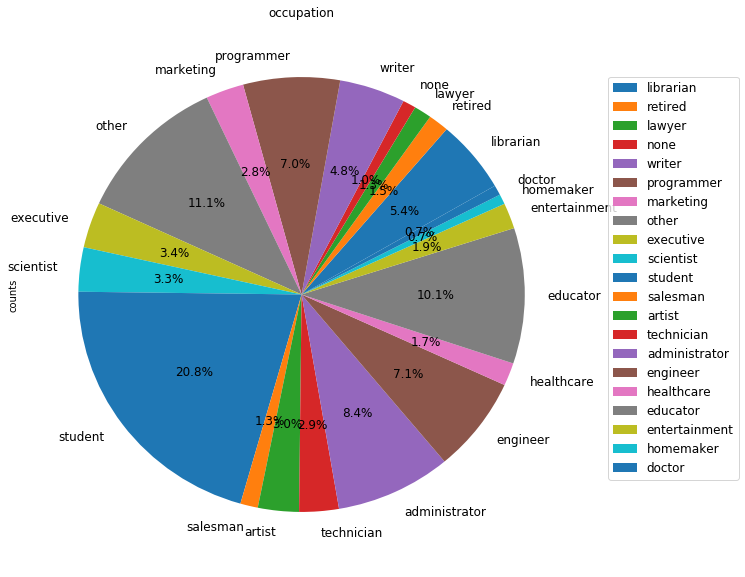

In [76]:
# 饼图参数 autopct='%1.1f%%' 一位小数的百分数（float)
ax =Occupation_pandas_df['counts'].plot(kind='pie',fontsize=12,
           title ="occupation",figsize=(10,10),startangle=30,autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.,fontsize=12)
plt.show()